<a href="https://colab.research.google.com/github/hydrationn/Machine-DeepLearning/blob/main/DeepLearning/lab/%EA%B3%BC%EC%A0%9C1_202101109_%EB%B0%95%EC%88%98%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import package

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.utils.data as data_utils

In [ ]:
import numpy as np
import pandas as pd

# import dataset

wine_red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

wine_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
# independent variable과 dependent variable 분리

X = wine_red.iloc[:, :-1]
y = wine_red.iloc[:, -1]

In [ ]:
# Data preprocessing - train/test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1199, 11) (1199,)
(400, 11) (400,)


In [ ]:
# Data preprocessing - normalization, tensor transformation

from sklearn.preprocessing import StandardScaler

# 데이터 스케일링
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# x 데이터를 FloatTensor로 변환
x_train_tensor = torch.FloatTensor(x_train_scaled)
x_test_tensor = torch.FloatTensor(x_test_scaled)

# y 데이터를 numpy 배열로 변환 후 FloatTensor로 변환
y_train_tensor = torch.FloatTensor(y_train.to_numpy())
y_test_tensor = torch.FloatTensor(y_test.to_numpy())

In [ ]:
# Data preprocessing - batch generation

# 데이터 배치화
train_data = data_utils.TensorDataset(x_train_tensor, y_train_tensor)
dataloader = data_utils.DataLoader(train_data, batch_size=100, shuffle=True, drop_last=True)

# 데이터 확인
for batch_idx, (x_batch, y_batch) in enumerate(dataloader):
  print(batch_idx)
  print(x_batch.shape)
  print(y_batch.shape)
  break

0
torch.Size([100, 11])
torch.Size([100])


In [ ]:
# Parameters

# Parameter 정의
input_size = 11
output_size = 1
learning_rate = 0.01
n_epochs = 100

In [ ]:
# Model

# model 생성
model = nn.Linear(input_size, output_size)

# 손실함수 생성
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
# Train / Validation

# Running the model
train_loss = []
test_loss = []

for epoch in range(n_epochs+1):

  for idx, (x_batch, y_batch) in enumerate(dataloader):
    # Batch 학습
    model.train()
    optimizer.zero_grad()
    y_pred = model(x_batch)
    y_pred = y_pred.reshape(-1)
    loss_train = criterion(y_pred, y_batch)
    loss_train.backward()
    optimizer.step()

    # Validation
    model.eval()
    y_test_pred = model(x_test_tensor)
    y_test_pred = y_test_pred.reshape(-1)
    loss_test = criterion(y_test_pred, y_test_tensor)

  train_loss.append(loss_train.item())
  test_loss.append(loss_test.item())
  print("epoch:{}, Loss_train:{:.2f}, Loss_test:{:.2f}".format(epoch, train_loss[-1], test_loss[-1]))

epoch:0, Loss_train:22.89, Loss_test:23.56
epoch:1, Loss_train:15.52, Loss_test:15.13
epoch:2, Loss_train:9.81, Loss_test:9.82
epoch:3, Loss_train:6.47, Loss_test:6.40
epoch:4, Loss_train:4.40, Loss_test:4.26
epoch:5, Loss_train:2.99, Loss_test:2.88
epoch:6, Loss_train:1.92, Loss_test:2.00
epoch:7, Loss_train:1.33, Loss_test:1.43
epoch:8, Loss_train:1.12, Loss_test:1.07
epoch:9, Loss_train:0.77, Loss_test:0.83
epoch:10, Loss_train:0.84, Loss_test:0.68
epoch:11, Loss_train:0.53, Loss_test:0.59
epoch:12, Loss_train:0.51, Loss_test:0.53
epoch:13, Loss_train:0.59, Loss_test:0.49
epoch:14, Loss_train:0.39, Loss_test:0.46
epoch:15, Loss_train:0.46, Loss_test:0.45
epoch:16, Loss_train:0.36, Loss_test:0.44
epoch:17, Loss_train:0.42, Loss_test:0.43
epoch:18, Loss_train:0.39, Loss_test:0.43
epoch:19, Loss_train:0.42, Loss_test:0.42
epoch:20, Loss_train:0.35, Loss_test:0.42
epoch:21, Loss_train:0.48, Loss_test:0.42
epoch:22, Loss_train:0.34, Loss_test:0.42
epoch:23, Loss_train:0.35, Loss_test:0.4

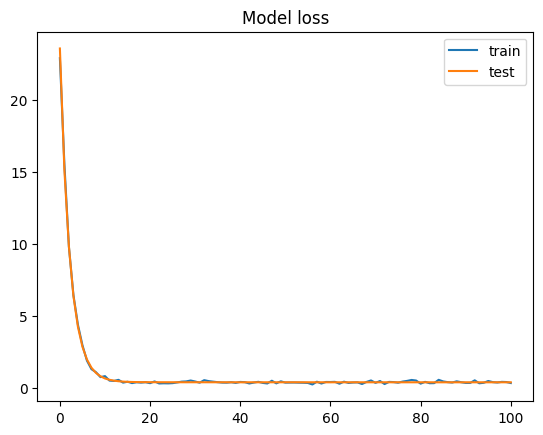

In [ ]:
# Plot

import matplotlib.pyplot as plt

plt.figure()
plt.plot(train_loss, label='train')
plt.plot(test_loss, label='test')
plt.title('Model loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Training result

model.state_dict()

OrderedDict([('weight',
              tensor([[-0.0040, -0.1736, -0.0136,  0.0047, -0.1085,  0.0518, -0.1126,  0.0141,
                       -0.0736,  0.1448,  0.3094]])),
             ('bias', tensor([5.6325]))])